<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 합성공 신경망을 사용한 이미지 분류

7장에서 사용한 밀집층에는 뉴런마다 **입력 개수만큼의 가중치가 있어**, 모든 입력에 가중치를 곱함



In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


### 합성곱 신경망 만들기

In [10]:
model = keras.Sequential()

In [11]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [12]:
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

InputLayer는 자동으로 생성됨

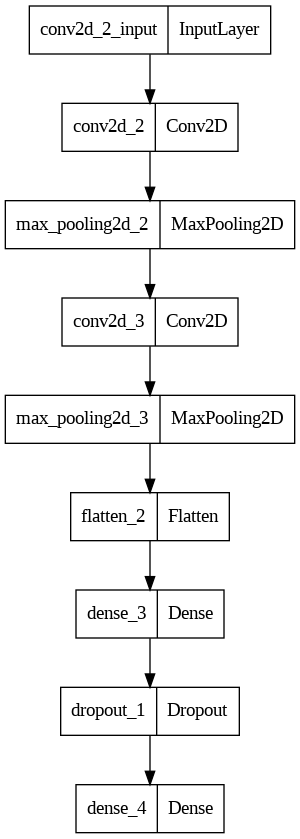

In [16]:
keras.utils.plot_model(model)

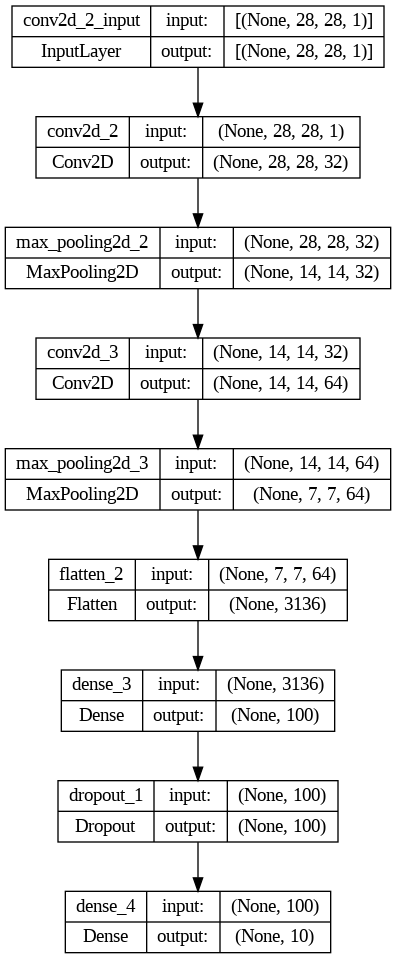

In [17]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 92s 60ms/step - loss: 0.5216 - accuracy: 0.8154 - val_loss: 0.3200 - val_accuracy: 0.8823
Epoch 2/20
   1/1500 [..............................] - ETA: 1:34 - loss: 0.3826 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 71s 48ms/step - loss: 0.3399 - accuracy: 0.8774 - val_loss: 0.2702 - val_accuracy: 0.9011
Epoch 3/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2913 - accuracy: 0.8946 - val_loss: 0.2535 - val_accuracy: 0.9050
Epoch 4/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2599 - accuracy: 0.9062 - val_loss: 0.2410 - val_accuracy: 0.9106
Epoch 5/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2331 - accuracy: 0.9137 - val_loss: 0.2343 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2150 - accuracy: 0.9202 - val_loss: 0.2187 - val_accuracy: 0.9171
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1959 - accuracy: 0.9265 - val_loss: 0.2162 - val_accuracy: 0.9204
Epoch 8/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1824 - accuracy: 0.9317 - val_loss: 0.2226 - val_accura

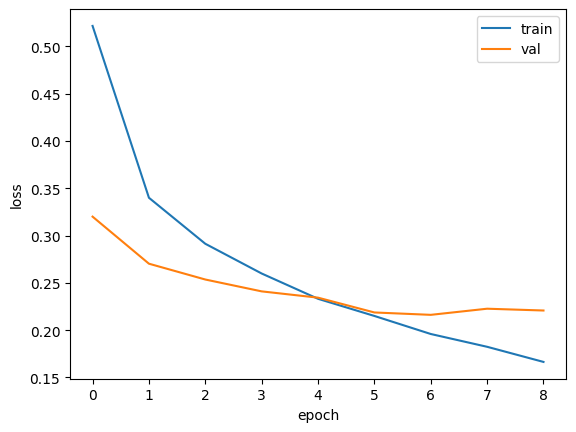

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2162 - accuracy: 0.9204


[0.21616241335868835, 0.9204166531562805]

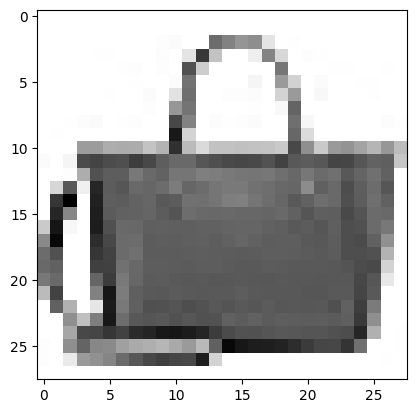

In [21]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [24]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 59ms/step
[[4.5835584e-16 1.4199654e-21 4.9222962e-18 7.5582173e-17 1.3357507e-15
  1.9875067e-17 4.8248153e-15 5.5862551e-17 1.0000000e+00 1.4352588e-19]]


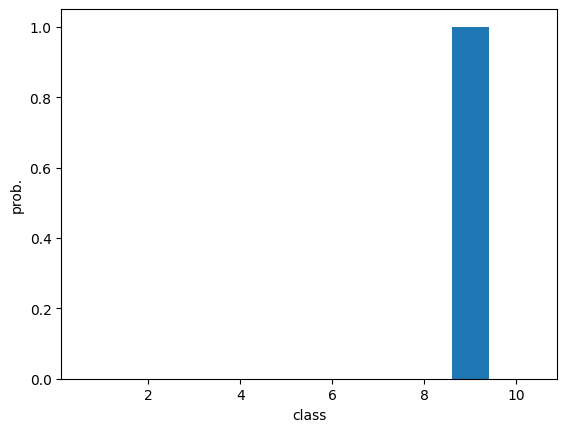

In [27]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [26]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [28]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [29]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [30]:

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2405 - accuracy: 0.9170


[0.24045942723751068, 0.9169999957084656]